# Pymaceuticals Inc.
---

### Analysis

1- The data set includes 249 different mice. However, 1 of the samples can't be used as there were different values for the same timepoint.
2- Capomulin drug regimen shows the smallest values regarding the Tumor Volume and Ketapril shows the largest values. 
3- More measurements have been done for Capomulin and Ramicane drug regimens while the least measurements were done for Propriva.
4- 51% of tested mice were male and the rest were female.
5- There was only one outlier detected for Capomulin, Ramicane, Infubinol, and Ceftamin drug regimens. The only outlier was for the Infubinol.

For a mouse treated with Capomulin following results were shown:

1- For a sample Mouse ID 'L509', the best drug result was seen on the 35th day, while the largest Tumor size was seen on the 20th day. 
2- It was observed that the average of Tumor size was bigger for a mouse with a higher weight, generally.
3- The correlation between the mouse weight and the average Tumor volume was 0.84.
4- The regression value for the mouse weight and average Tumor size is : y=0.95x + 21.55, where x is weight (g) and y is Tumor Volume (mm3)
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
combined_data.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [20]:
# Checking the number of mice.
number_of_mice = len(combined_data['Mouse ID'].unique())
number_of_mice

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_mice = combined_data.loc[duplicate_bool=True]
duplicate_bool = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice = combined_data.loc[duplicate_bool == True]
print(duplicate_mice)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_bool_optional = combined_data.duplicated(subset=['Mouse ID'])
duplicate_mice_optional = combined_data.loc[duplicate_bool == True]
print(duplicate_mice_optional)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = combined_data[combined_data['Mouse ID'] != 'g989']
combined_data_clean

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1888    Male          22          17  
1889    Male          22          17  
1890    Male          22          17  
1891    Male          22          17  
1892    Male          22          17  

[1880 rows x 8 columns]

In [24]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = len(combined_data_clean['Mouse ID'].unique())
number_of_mice_clean

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regiment_mean = combined_data_clean.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].to_frame('Mean Tumor Volume')
drug_regiment_median = combined_data_clean.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].to_frame('Median Tumor Volume')
drug_regiment_variance = combined_data_clean.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].to_frame('Tumor Volume Variance')
drug_regiment_stdev = combined_data_clean.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].to_frame('Tumor Volume Std. Dev.')
drug_regiment_sem = combined_data_clean.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].to_frame('Tumor Volume Std. Err.')

# Assemble the resulting series into a single summary DataFrame.
df_rest = [drug_regiment_variance, drug_regiment_stdev, drug_regiment_sem]
summary_df = pd.merge(drug_regiment_mean, drug_regiment_median, on='Drug Regimen')
for item in df_rest:
    summary_df = pd.merge(summary_df, item, on='Drug Regimen')
summary_df


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_agg = combined_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_df_agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

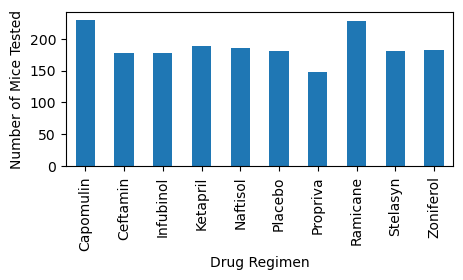

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_timepoints = combined_data_clean.groupby(['Drug Regimen']).count()['Timepoint']
number_of_timepoints.plot(kind = 'bar', figsize = (5,2), xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested')
plt.show()


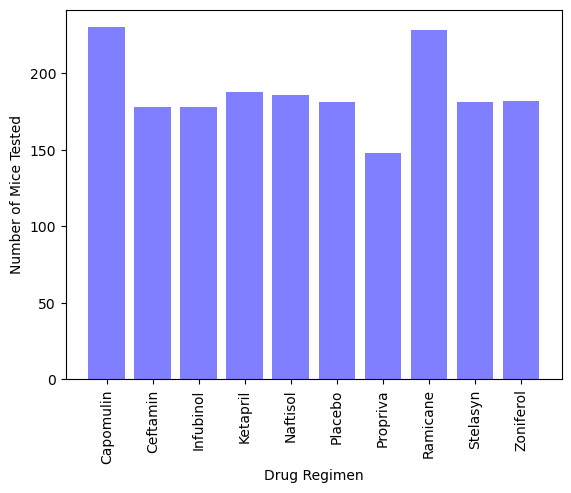

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
from importlib import reload
plt = reload(plt)
number_of_timepoints = combined_data_clean.groupby(['Drug Regimen']).count()['Timepoint']
plt.bar(number_of_timepoints.index, number_of_timepoints.values, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


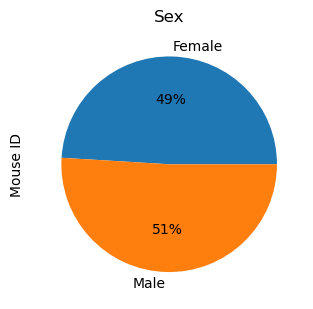

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# combined_data_clean_df = pd.DataFrame(combined_data_clean)
gender_count = combined_data_clean.groupby(['Sex']).count()['Mouse ID']
gender_count.plot(kind="pie", figsize=(20,3.5), autopct='%1.0f%%')
plt.title('Sex')
plt.show()


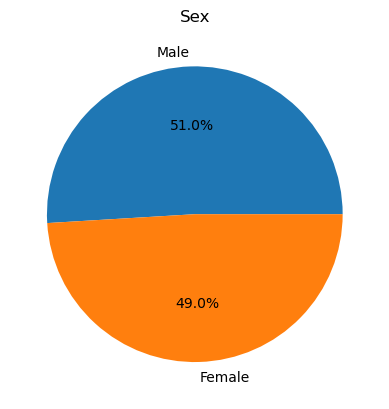

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
combined_data_clean_df = pd.DataFrame(combined_data_clean)
number_of_males = combined_data_clean_df.loc[combined_data_clean_df['Sex'] == 'Male'].count()
number_of_females = combined_data_clean_df.loc[combined_data_clean_df['Sex'] == 'Female'].count()
gender_count = [number_of_males['Sex'], number_of_females['Sex']]
plt.pie(gender_count, labels = ['Male', 'Female'], autopct="%1.1f%%")
plt.title('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# treatment_regimens_selected = combined_data_clean_df.loc[combined_data_clean_df['Drug Regimen'].isin(treatment_regimens)]
# treatment_regimens_selected
# Start by getting the last (greatest) timepoint for each mouse
mouse_last_tp = combined_data_clean_df.groupby(['Mouse ID']).max()['Timepoint']
mouse_last_tp_df = pd.DataFrame(mouse_last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(combined_data_clean_df, mouse_last_tp_df, on='Mouse ID')
last_tumor_vol1 = last_tumor_vol.query('Timepoint_x == Timepoint_y')
last_tumor_vol1


Mouse ID  Timepoint_x  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
9        b128           45           38.982878                 2    Capomulin   
10       f932            0           45.000000                 0     Ketapril   
18       g107           35           71.905117                 0     Ketapril   
21       a457           10           49.783419                 0     Ketapril   
30       c819           40           62.175705                 1     Ketapril   
...       ...          ...                 ...               ...          ...   
1844     t565           45           34.455298                 0    Capomulin   
1854     i557           45           47.685963                 1    Capomulin   
1864     m957           45           33.329098                 1    Capomulin   
1869     f966           20           30.485985                 0    Capomulin   
1879     m601           45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  Timepoint_y  
9     Female           9          22           45  
10      Male          15          29            0  
18    Female           2          29           35  
21    Female          11          30           10  
30      Male          21          25           40  
...      ...         ...         ...          ...  
1844  Female          20          17           45  
1854  Female           1          24           45  
1864  Female           3          19           45  
1869    Male          16          17           20  
1879    Male          22          17           45  

[248 rows x 9 columns]

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for item in treatment_regimens:
    tumor_vol_data1 = last_tumor_vol1.loc[last_tumor_vol1['Drug Regimen'] == item, 'Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol_data1)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for i in range (len(tumor_vol_data)):
    quartiles = tumor_vol_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    mouse_potential_outlier = tumor_vol_data[i].loc[~tumor_vol_data[i].between(lower_bound, upper_bound)]
    print(f"{treatment_regimens[i]}'s potential outliers: {mouse_potential_outlier}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


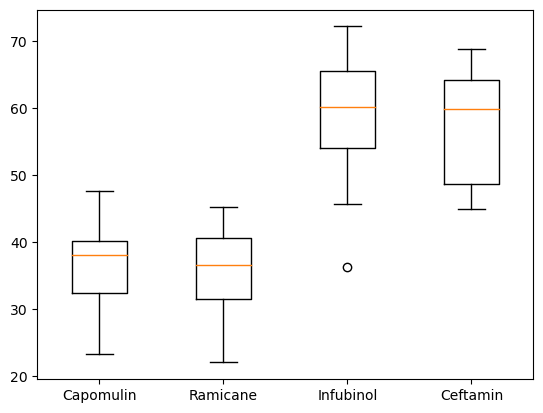

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots() 
ax1.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

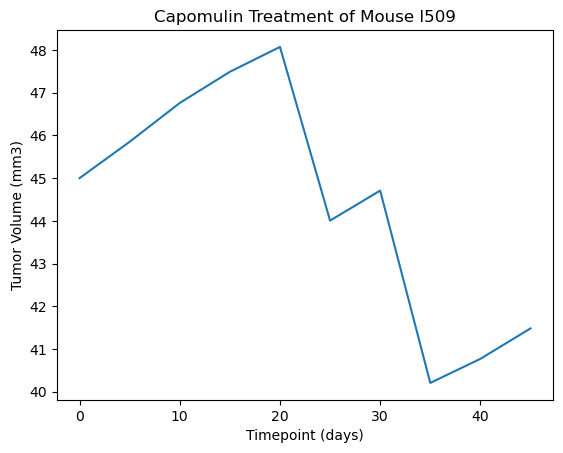

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
from importlib import reload
plt = reload(plt)
mouse_l509_tp = combined_data_clean.loc[combined_data_clean['Mouse ID'] == 'l509', 'Timepoint']
mouse_l509_tv = combined_data_clean.loc[combined_data_clean['Mouse ID'] == 'l509', 'Tumor Volume (mm3)']
plt.plot(mouse_l509_tp, mouse_l509_tv)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

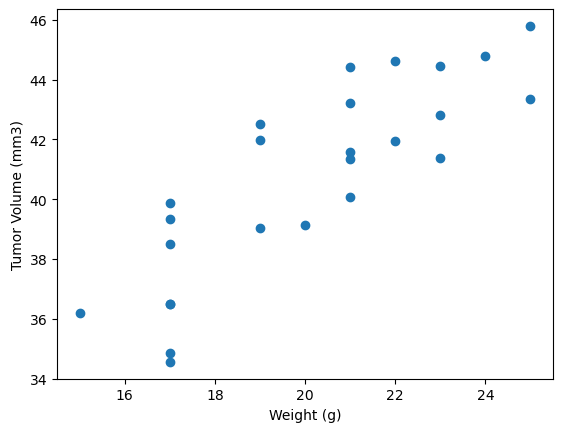

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capom_tp_average = combined_data_clean.loc[combined_data_clean['Drug Regimen'] == 'Capomulin']
capom_tp_average
capom_tp_average_tv = capom_tp_average.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
capom_tp_average_wei = capom_tp_average.groupby('Mouse ID').mean()['Weight (g)']
capom_tp_average_df = pd.merge(capom_tp_average_tv, capom_tp_average_wei, on='Mouse ID')
plt.scatter(capom_tp_average_df['Weight (g)'], capom_tp_average_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


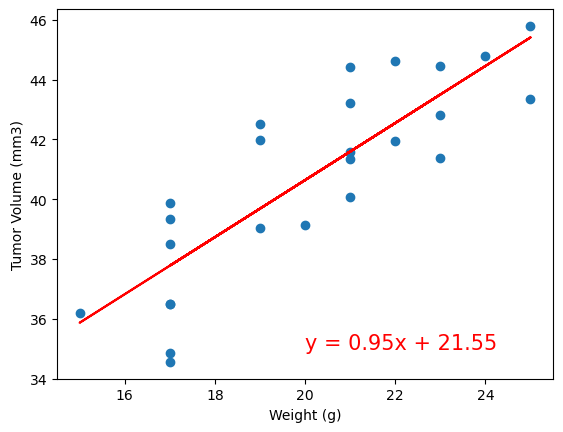

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = capom_tp_average_df['Weight (g)']
y_values = capom_tp_average_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is {round (rvalue, 2)}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

